In [1]:
# Importando as dependências
from QKDnet.components import Network, Controller
from QKDnet.sim import Simulation
from QKDnet.utils import Logger

# Ativar os logs:
# Logger.activate(Logger)

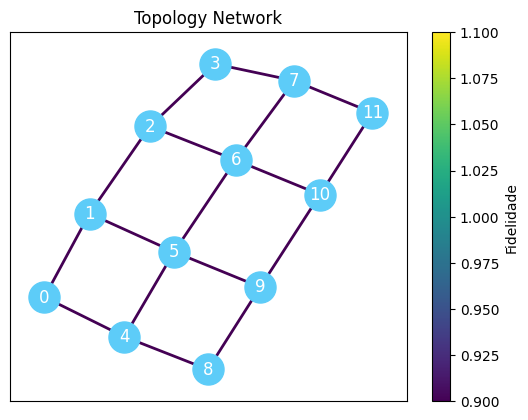

In [2]:
# Rede
rede = Network()
rede.set_topology("Lattice", 3,4)
rede.draw()
# Controlador
controlador = Controller(rede)

In [3]:
# Parâmetros da simulação
n_requests = 100
n_qubits = 1000
capabilities = [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 100]
apps_distribution = [0.33, 0.33, 0.33]
simulation_case = 8

In [4]:
# Simulações
simulations = []

print('Urgency')

for c in capabilities:
    # Rede
    rede = Network()
    rede.set_topology("Lattice", 3,4)
    rede.set_nqubits(n_qubits)
    # Controlador
    controlador = Controller(rede)
    # Ordenador de requests
    controlador.set_sorter('urgency')
    
    # Simulação
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    print(f'Número de requisições atendidas: {len(sim.controller.data_base.served_requests)}')
    print(f'Tempo final: {sim.controller.data_base.final_time}')
    print('Fim da simulação.')

Urgency
Número de requisições atendidas: 35
Tempo final: 16
Fim da simulação.
Número de requisições atendidas: 74
Tempo final: 16
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 13
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 9
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 10
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 6
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.


In [5]:
for simulation in simulations:
    print(f'{len(simulation.controller.data_base.served_requests)} - {simulation.controller.data_base.final_time}')
    
simulations.clear()

35 - 16
74 - 16
100 - 13
100 - 9
100 - 10
100 - 6
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5


In [6]:
# Simulações
simulations = []

print('FIFO')

for c in capabilities:
    # Rede
    rede = Network()
    rede.set_topology("Lattice", 3,4)
    rede.set_nqubits(n_qubits)
    # Controlador
    controlador = Controller(rede)
    # Ordenador de requests
    controlador.set_sorter('fifo')
    
    # Simulação
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    print(f'Número de requisições atendidas: {len(sim.controller.data_base.served_requests)}')
    print(f'Tempo final: {sim.controller.data_base.final_time}')
    print('Fim da simulação.')

FIFO
Número de requisições atendidas: 48
Tempo final: 16
Fim da simulação.
Número de requisições atendidas: 71
Tempo final: 15
Fim da simulação.
Número de requisições atendidas: 90
Tempo final: 11
Fim da simulação.
Número de requisições atendidas: 92
Tempo final: 10
Fim da simulação.
Número de requisições atendidas: 97
Tempo final: 9
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.


In [7]:
for simulation in simulations:
    print(f'{len(simulation.controller.data_base.served_requests)} - {simulation.controller.data_base.final_time}')
    
simulations.clear()

48 - 16
71 - 15
90 - 11
92 - 10
97 - 9
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5


In [8]:
# Simulações
simulations = []

print('Longest')

for c in capabilities:
    # Rede
    rede = Network()
    rede.set_topology("Lattice", 3,4)
    rede.set_nqubits(n_qubits)
    # Controlador
    controlador = Controller(rede)
    # Ordenador de requests
    controlador.set_sorter('longest')
    
    # Simulação
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    print(f'Número de requisições atendidas: {len(sim.controller.data_base.served_requests)}')
    print(f'Tempo final: {sim.controller.data_base.final_time}')
    print('Fim da simulação.')

Longest
Número de requisições atendidas: 43
Tempo final: 16
Fim da simulação.
Número de requisições atendidas: 71
Tempo final: 13
Fim da simulação.
Número de requisições atendidas: 85
Tempo final: 12
Fim da simulação.
Número de requisições atendidas: 90
Tempo final: 10
Fim da simulação.
Número de requisições atendidas: 97
Tempo final: 9
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.


In [9]:
for simulation in simulations:
    print(f'{len(simulation.controller.data_base.served_requests)} - {simulation.controller.data_base.final_time}')
    
simulations.clear()

43 - 16
71 - 13
85 - 12
90 - 10
97 - 9
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5


In [10]:
# Simulações
simulations = []

print('Shortest')

for c in capabilities:
    # Rede
    rede = Network()
    rede.set_topology("Lattice", 3,4)
    rede.set_nqubits(n_qubits)
    # Controlador
    controlador = Controller(rede)
    # Ordenador de requests
    controlador.set_sorter('shortest')
    
    # Simulação
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    print(f'Número de requisições atendidas: {len(sim.controller.data_base.served_requests)}')
    print(f'Tempo final: {sim.controller.data_base.final_time}')
    print('Fim da simulação.')

Shortest
Número de requisições atendidas: 38
Tempo final: 16
Fim da simulação.
Número de requisições atendidas: 74
Tempo final: 13
Fim da simulação.
Número de requisições atendidas: 84
Tempo final: 11
Fim da simulação.
Número de requisições atendidas: 95
Tempo final: 9
Fim da simulação.
Número de requisições atendidas: 94
Tempo final: 9
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.
Número de requisições atendidas: 100
Tempo final: 5
Fim da simulação.


In [11]:
for simulation in simulations:
    print(f'{len(simulation.controller.data_base.served_requests)} - {simulation.controller.data_base.final_time}')
    
simulations.clear()

38 - 16
74 - 13
84 - 11
95 - 9
94 - 9
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5
100 - 5
